<a href="https://colab.research.google.com/github/NgoMinhQuang/BaiTapAI_CNN/blob/main/NhanDangTraiCay_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import glob
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
training_set=train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/TRAICAY/train/train',target_size=(150,150), batch_size=40, class_mode='categorical')
validation_set=validation.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/TRAICAY/train/validation',target_size=(150,150), batch_size=40, class_mode='categorical')

Found 513 images belonging to 5 classes.
Found 513 images belonging to 5 classes.


In [11]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Buoi': 0, 'Cam': 1, 'Coc': 2, 'Khe': 3, 'Mit': 4}

In [13]:
#Tạo Model
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 64)      

In [14]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',  metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(training_set, epochs = 20, validation_data = validation_set, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=15)])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
13/13 [==============================] - 236s 19s/step - loss: 38.5299 - accuracy: 0.5146 - val_loss: 0.1145 - val_accuracy: 0.9766
Epoch 2/20
13/13 [==============================] - 18s 1s/step - loss: 0.1254 - accuracy: 0.9805 - val_loss: 0.0813 - val_accuracy: 0.9825
Epoch 3/20
13/13 [==============================] - 18s 1s/step - loss: 0.0167 - accuracy: 0.9942 - val_loss: 0.0046 - val_accuracy: 0.9981
Epoch 4/20
13/13 [==============================] - 18s 1s/step - loss: 0.0039 - accuracy: 0.9981 - val_loss: 1.2108 - val_accuracy: 0.8090
Epoch 5/20
13/13 [==============================] - 18s 1s/step - loss: 15.9467 - accuracy: 0.7329 - val_loss: 0.0164 - val_accuracy: 0.9961
Epoch 6/20
13/13 [==============================] - 18s 1s/step - loss: 0.0169 - accuracy: 0.9961 - val_loss: 1.2410e-04 - val_accuracy: 1.0000
Epoch 7/20
13/13 [==============================] - 18s 1s/step - loss: 1.2455e-04 - accuracy: 1.0000 - val_loss: 7.0897e-05 - val_accuracy: 1.0000
Epoc

In [15]:
model.save('CNN_Fruit.h5')

Sai số kiểm tra là:  8.667647932725231e-08
Độ chính xác kiểm tra là:  1.0


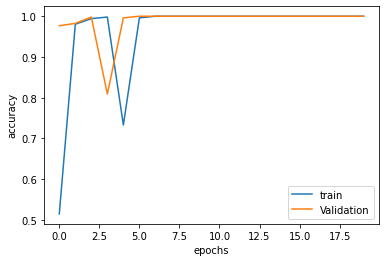

In [16]:
score = model.evaluate(validation_set,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [17]:
from keras.models import load_model
CNN_Fruit=load_model('CNN_Fruit.h5')

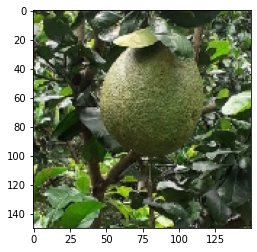

In [18]:
img_path = '/content/drive/MyDrive/Colab Notebooks/TRAICAY/test/Buoi/Buoi_00086.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
traicay=np.argmax(CNN_Fruit.predict(img),axis=1)
pred = model.predict(img)

classes = ['LÀ BƯỞI','LÀ CAM','LÀ CỐC','LÀ KHẾ','LÀ MÍT']

In [19]:
print(np.argmax(pred))
if traicay==0:
  print(classes[0])
else: print(classes[1])

0
LÀ BƯỞI
